<a href="https://colab.research.google.com/github/Jordy-Rodrigues/Modelo_DBSCAN/blob/main/Clustering_com_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTAR A BIBLIOTECA DO GOOGLE COLAB PARA ABRIR ARQUIVOS
from google.colab import files

In [2]:
# PROCURAR A BASE DE DADOS E ABRIR
carregar = files.upload()

Saving ex7data2.mat to ex7data2.mat


In [3]:
# USAR CONDIÇÃO FOR
# PARA MINHA BASE DE DADOS VAI MOSTRAR O NOME DO ARQUIVO E O FORMATO, E TAMBÉM MOSTRAR O TAMANHO DO ARQUIVO
for fv in carregar.keys():
  nome = fv
  tamanho = len(carregar[fv])
print(f'Arquivo carregado: {nome} \nTamanho: {tamanho} Bytes')

Arquivo carregado: ex7data2.mat 
Tamanho: 4784 Bytes


In [4]:
# IMPORTAR A BIBLIOTECA NECESSÁRIA PARA ABRIR O ARQUIVO DO FORMATO .mat
import scipy.io as spio

In [5]:
# CRIAR VARIÁVEL QUE VAU RECEBER O NOME DA BASE DE DADOS QUE VAI SER UTILIZADA
arquivo = 'ex7data2.mat'
# CRIAR UMA OUTRA VARIÁVEL QUE VAI RECEBER O NOME DA COLUNA
coluna = ['X']

In [6]:
# CARREGAR A BASE DE DADOS
raw_mat = spio.loadmat(arquivo)
X = raw_mat.get('X')

In [7]:
# MOSTRAR AS 5 PRIMEIRAS LINHAS DA BASE DE DADOS
X[:5]

array([[1.84207953, 4.6075716 ],
       [5.65858312, 4.79996405],
       [6.35257892, 3.2908545 ],
       [2.90401653, 4.61220411],
       [3.23197916, 4.93989405]])

# CRIAR GRÁFICO

In [8]:
# IMPORTAR AS BIBLIOTECAS PARA PLOTAR GRÁFICO
import matplotlib.pyplot as plt
import seaborn as sns

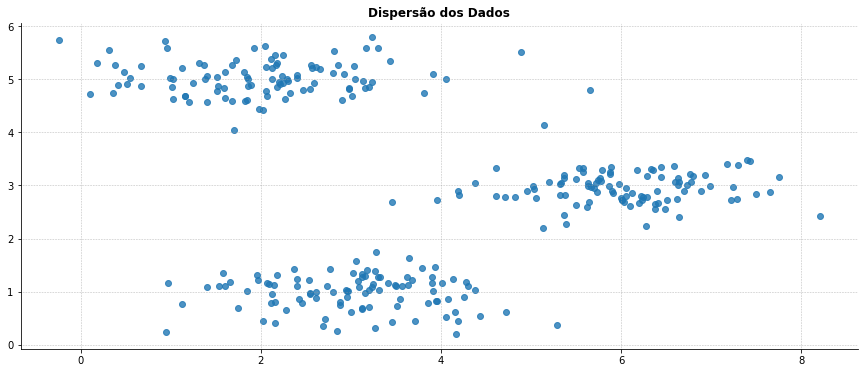

In [9]:
# DEFINIR O TAMANHO DO GRÁFICO
plt.figure(figsize=(15,6))
# CRIAR UMA GRADE BEM VISÍVEL PARA VER MELHOR A DISTRIBUIÇÃO DOS PONTOS DISPERSOS
plt.grid(color='0.6',linestyle=':', linewidth=0.6)
# CRIAR A DISPERSÃO DOS PONTOS 
plt.scatter(X[:, 0], X[:, 1], marker='o', alpha=0.8)
# COLOCAR UM TÍTULO NA PARTE DE CIMA DO GRÁFICO
plt.title ('Dispersão dos Dados',fontweight='bold')
# MOSTRAR O GRÁFICO
sns.despine()

# UTILIZAR O ALGORITMO DE MACHINE LEARNING

In [10]:
# IMPORTAR O ALGORITMO DE AGRUPAMENTO MACHINE LEARNIG
from sklearn.cluster import DBSCAN

In [11]:
# CRIAR O MODELO
# POSSO TESTAR VARIAS POSSIBILIDADES DE PARÂMETROS
modelo = DBSCAN (eps=0.5, min_samples=10)
modelo

DBSCAN(min_samples=10)

In [12]:
# TREINAR O MODELO 
# OBS: '-1' SIGNIFICA UM RUIDO, OU QUE NÃO CONSEGUIU TER SIMILARIDADE COM NEM UM DOS GRUPOS CRIADOS
y_pred = modelo.fit_predict(X)
# MOSTRAR 
y_pred

array([ 0, -1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  2,  2,
        2,  2,  2,  2,  2,  2,  2, -1,  2, -1,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2, -1,  2, -1,  2,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1

In [13]:
labels = modelo.labels_
# CALCULAR A QUANTIDADE DE GRUPOS
n_clusters_ = len (set(labels)) - (1 if -1 in labels else 0)
# CALCULAR A QUANTIDADE DE RUIDOS
n_noise_ = list (labels).count(-1)

# VISUALIZAR NO GRÁFICO O RESULTADO

Text(0.5, 1.0, 'DBSCAN Implementeção simplificada \n Agrupamento: grupos$= 3$, pontos ruído $= 21$')

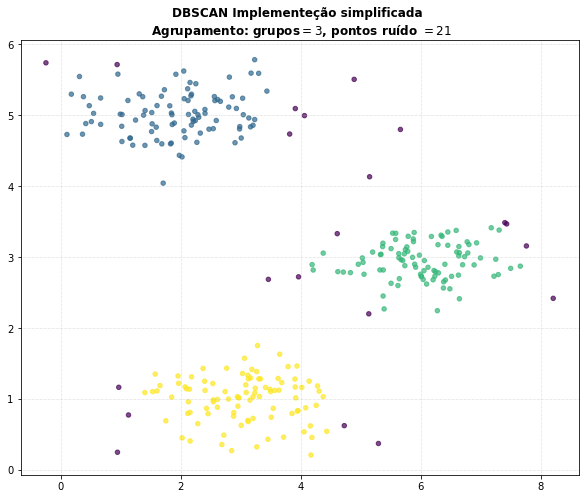

In [14]:
# DEFINIR O TAMANHO DO GRÁFICO
plt.figure (figsize=(10,8))
# COLOCAR GRADES NO GRÁFICO
plt.grid (color='0.7', linestyle=':', linewidth=0.5)
# COLOCAR OS DADOS DE X PARA CRIAR O GRÁFICO
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=20, cmap='viridis', alpha=0.7)
# MOSTRAR TÍTULO E INSFORMAÇÕES DA QUANTIDADE DE GRUPOS E RUIDOS 
plt.title(f'DBSCAN Implementeção simplificada \n Agrupamento: grupos$= {n_clusters_}$, pontos ruído $= {n_noise_}$', fontweight='bold')